# CS 1656 – Introduction to Data Science (Fall 2024) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Zi Han Ding

## Term Project 

**Released: March 20, 2024**

**Due: April 17, 2024**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations
# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [176]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

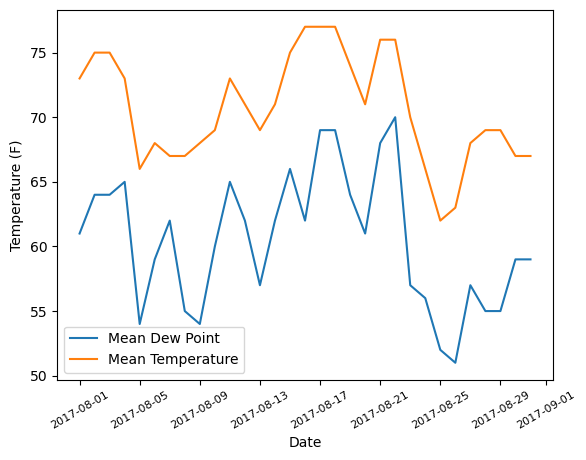

In [177]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [178]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])

### Task 1.1

In [179]:
trips = calculations.get_trips()
trips.head(5)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,day,month
0,111375309,2021-01-12 12:48:00,1/12/2021 13:04,70782,963,49641.0,11th St & Penn Ave,1061.0,33rd St & Penn Ave,Subscriber,01/12/2021,01/2021
1,111390480,2021-01-13 09:32:00,1/13/2021 9:39,70578,387,49391.0,E Liberty Blvd & Negley Ave,1064.0,Frankstown Ave & E Liberty Blvd,Subscriber,01/13/2021,01/2021
2,111441111,2021-01-15 17:43:00,1/15/2021 18:52,70935,4190,1072.0,Glasshouse,1072.0,Glasshouse,Subscriber,01/15/2021,01/2021
3,111529394,2021-01-20 16:00:00,1/20/2021 16:11,70910,612,1068.0,Forbes Ave & Murray Ave,1032.0,Walnut St & College St,Subscriber,01/20/2021,01/2021
4,111609524,2021-01-24 14:40:00,1/24/2021 21:12,70910,23511,1032.0,Walnut St & College St,1056.0,Wood St & Sixth Ave,Customer,01/24/2021,01/2021


### Task 1.1

In [180]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,1,1,0
1,01/01/2021,1010,1,0,1
2,01/01/2021,1024,1,1,0
3,01/01/2021,1028,1,1,0
4,01/01/2021,1032,1,0,1
5,01/01/2021,1059,1,1,0
6,01/01/2021,1062,2,2,0
7,01/01/2021,1094,2,0,2
8,01/01/2021,49301,1,2,1
9,01/01/2021,49671,1,0,1


### Task 1.2

In [181]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,23,29,6
1,01/2021,1001,18,27,9
2,01/2021,1002,27,27,0
3,01/2021,1003,2,1,1
4,01/2021,1004,20,16,4
5,01/2021,1005,6,3,3
6,01/2021,1006,8,8,0
7,01/2021,1007,9,7,2
8,01/2021,1009,8,3,5
9,01/2021,1010,47,30,17


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [182]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046


### Task 2.1

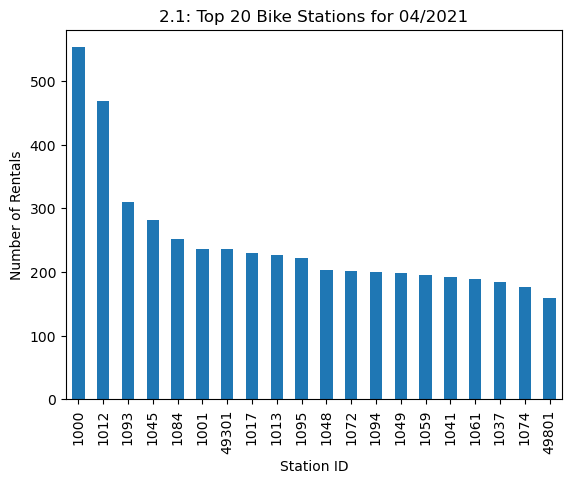

In [183]:
filtered_data = monthly_counts[monthly_counts['month'] == filter_month].copy()
station_counts = filtered_data.groupby('station_id')['fromCNT'].sum().sort_values(ascending=False)
top_20_stations = station_counts.head(20)

top_20_stations.plot(kind='bar')
plt.xlabel('Station ID')
plt.ylabel('Number of Rentals')
plt.title('2.1: Top 20 Bike Stations for {}'.format(filter_month))
plt.show()

### Task 2.2

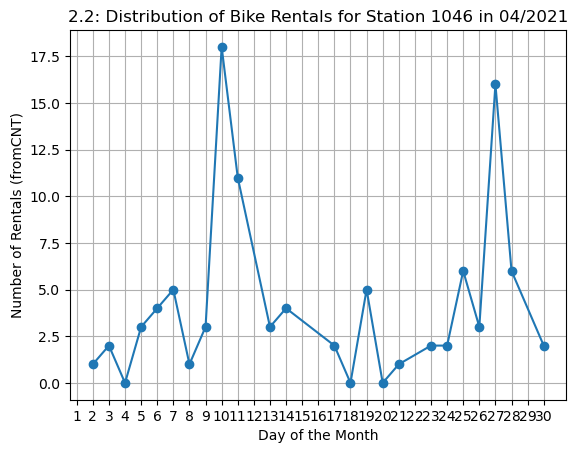

In [184]:
daily_counts['month'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y').dt.strftime('%m/%Y').copy()

filtered_df = daily_counts[(daily_counts['month'] == filter_month) & (daily_counts['station_id'] == filter_stationID)]
#print(filtered_df)
filtered_df = filtered_df.sort_values(by='day')

days = pd.to_datetime(filtered_df['day'], format='%m/%d/%Y').dt.day
fromCNT = filtered_df['fromCNT']
#print(fromCNT)

plt.plot(days, fromCNT, marker='o', linestyle='-')
plt.title(f'2.2: Distribution of Bike Rentals for Station {filter_stationID} in {filter_month}')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rentals (fromCNT)')
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()

### Task 2.3

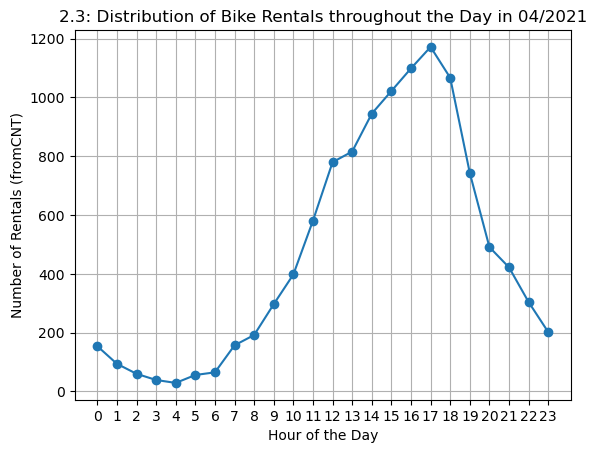

In [185]:
trips_month = trips[trips['Starttime'].dt.strftime('%m/%Y') == filter_month].copy()
    
trips_month['hour'] = trips_month['Starttime'].dt.hour

hourly_counts = trips_month.groupby('hour').size().reset_index(name='fromCNT')
#print(hourly_counts)

plt.plot(hourly_counts['hour'], hourly_counts['fromCNT'], marker='o', linestyle='-')
plt.title(f'2.3: Distribution of Bike Rentals throughout the Day in {filter_month}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals (fromCNT)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

### Task 2.4

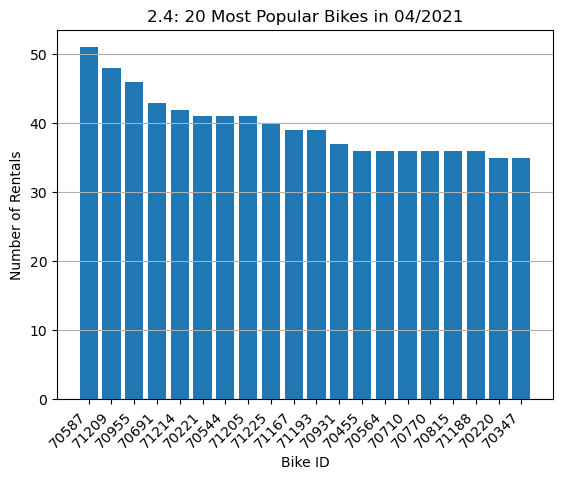

In [186]:
trips_month = trips[trips['Starttime'].dt.strftime('%m/%Y') == filter_month].copy()
    
bike_rentals_per_day = trips_month.groupby(['Bikeid', 'Starttime']).size().reset_index(name='rentals_count')
#print(bike_rentals_per_day)
    
bike_total_rentals = bike_rentals_per_day.groupby('Bikeid')['rentals_count'].sum().reset_index(name='total_rentals')
bike_total_rentals['Bikeid'] = bike_total_rentals['Bikeid'].astype(str)
#print(bike_total_rentals)
top_20_bikes = bike_total_rentals.nlargest(20, 'total_rentals')
#print(top_20_bikes)

plt.bar(top_20_bikes['Bikeid'], top_20_bikes['total_rentals'])
plt.title(f'2.4: 20 Most Popular Bikes in {filter_month}')
plt.xlabel('Bike ID')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

/var/folders/bw/6jxnscnd3vn40ftfn2vzqnmc0000gn/T/ipykernel_5291/2936795761.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_stations1['station_id']= filtered_data['station_id'].astype(str)


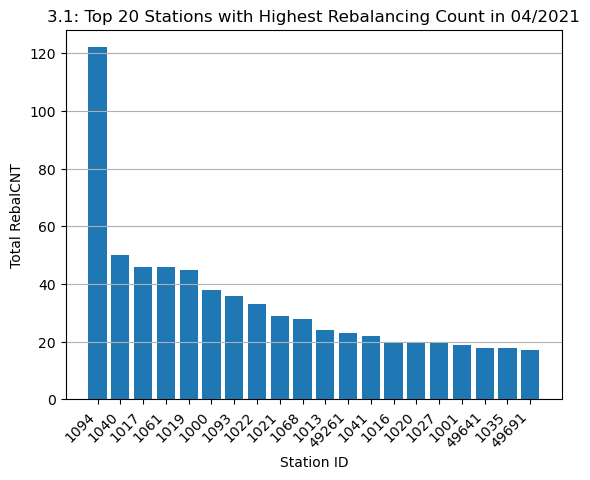

In [187]:
filtered_data = monthly_counts[monthly_counts['month'] == filter_month].copy()
#print(filtered_data)

filtered_data['station_id'] = filtered_data['station_id'].astype(str)

filtered_data = filtered_data.sort_values(by='rebalCNT', ascending=False)

top_20_stations1 = filtered_data.head(20)
top_20_stations1['station_id']= filtered_data['station_id'].astype(str)
#print(top_20_stations1)

plt.bar(top_20_stations1['station_id'], top_20_stations1['rebalCNT'])
plt.title(f'3.1: Top 20 Stations with Highest Rebalancing Count in {filter_month}')
plt.xlabel('Station ID')
plt.ylabel('Total RebalCNT')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### Task 3.2

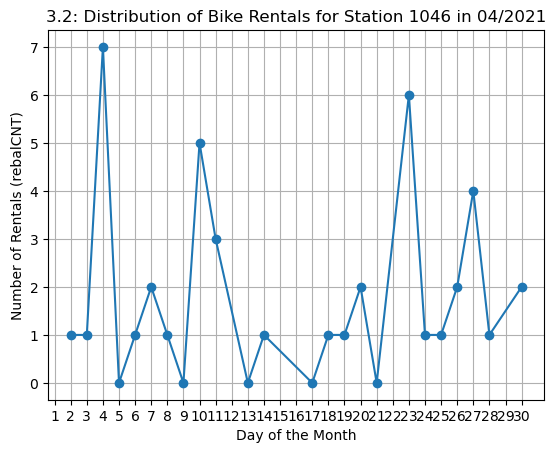

In [188]:
daily_counts['month'] = pd.to_datetime(daily_counts['day'], format='%m/%d/%Y').dt.strftime('%m/%Y').copy()

filtered_df = daily_counts[(daily_counts['month'] == filter_month) & (daily_counts['station_id'] == filter_stationID)]
#print(filtered_df)
filtered_df = filtered_df.sort_values(by='day')

days = pd.to_datetime(filtered_df['day'], format='%m/%d/%Y').dt.day
rebalCNT = filtered_df['rebalCNT']
#print(rebalNT)

plt.plot(days, rebalCNT, marker='o', linestyle='-')
plt.title(f'3.2: Distribution of Bike Rentals for Station {filter_stationID} in {filter_month}')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rentals (rebalCNT)')
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [189]:
from sklearn.cluster import KMeans, DBSCAN

second_quarter_counts = monthly_counts[monthly_counts['month'].str.startswith(('04/', '05/', '06/'))]
df = second_quarter_counts.pivot_table(index='station_id', columns='month', values=['fromCNT', 'rebalCNT'], aggfunc='sum')
df.columns = ['_'.join(col) for col in df.columns.values]
df.reset_index(inplace=True)
df.rename(columns={'fromCNT_04/2021': 'fromCNT4',
                             'fromCNT_05/2021': 'fromCNT5',
                             'fromCNT_06/2021': 'fromCNT6',
                             'rebalCNT_04/2021': 'rebalCNT4',
                             'rebalCNT_05/2021': 'rebalCNT5',
                             'rebalCNT_06/2021': 'rebalCNT6'}, inplace=True)

df.fillna(0, inplace=True)
#print(df)
params = ['fromCNT4', 'fromCNT5', 'fromCNT6', 'rebalCNT4', 'rebalCNT5', 'rebalCNT6']


kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=5000)
kmeans1.fit(df[params])
df['Cluster1'] = kmeans1.labels_

kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=5000)
kmeans2.fit(df[params])
df['Cluster2'] = kmeans2.labels_

kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=5000)
kmeans3.fit(df[params])
df['Cluster3'] = kmeans3.labels_

dbscan1 = DBSCAN(eps=50, min_samples=3)
df['Cluster4'] = dbscan1.fit_predict(df[params])

dbscan2 = DBSCAN(eps=40, min_samples=3)
df['Cluster5'] = dbscan2.fit_predict(df[params])

dbscan3 = DBSCAN(eps=50, min_samples=5)
df['Cluster6'] = dbscan3.fit_predict(df[params])

#print(df)

/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Task 4.2

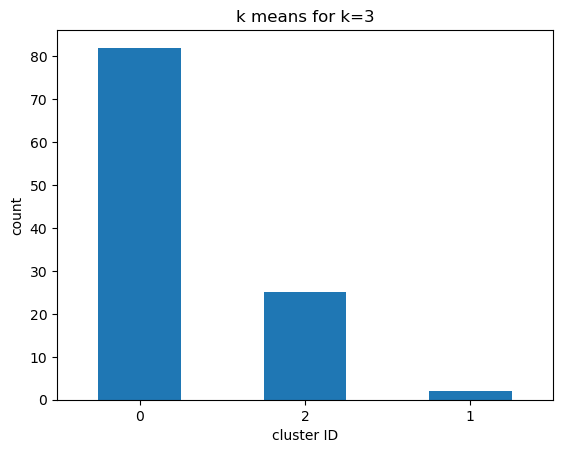

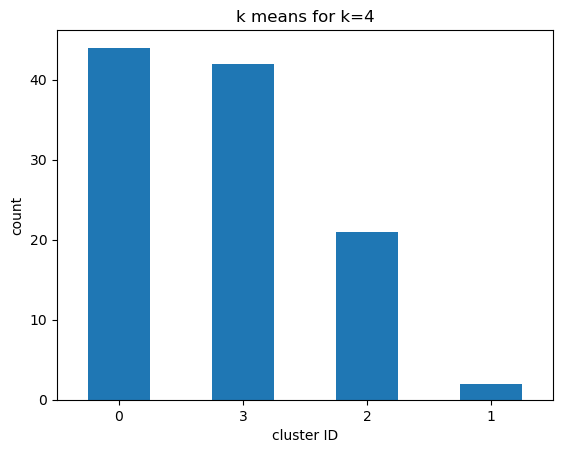

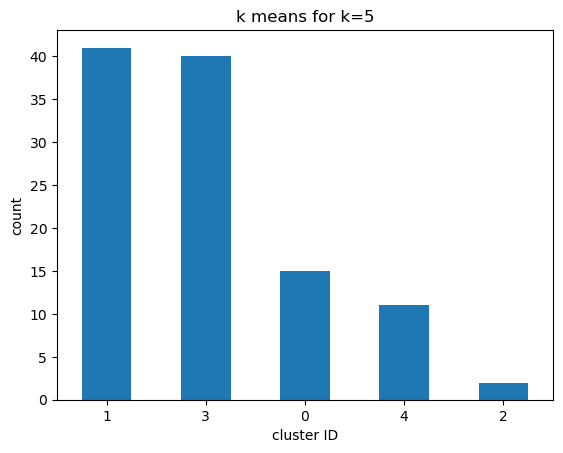

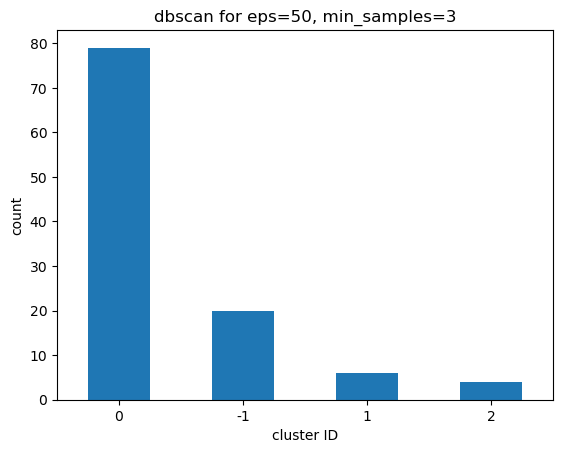

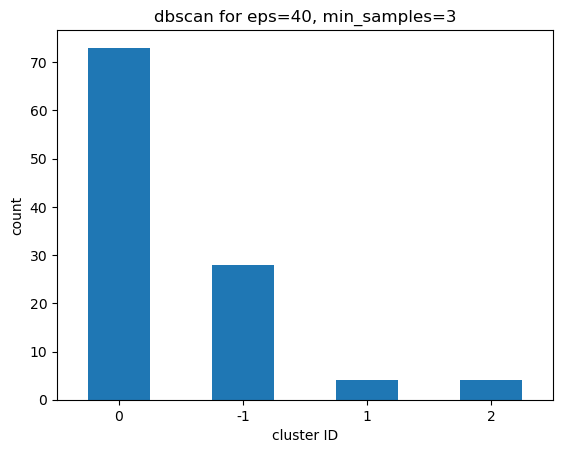

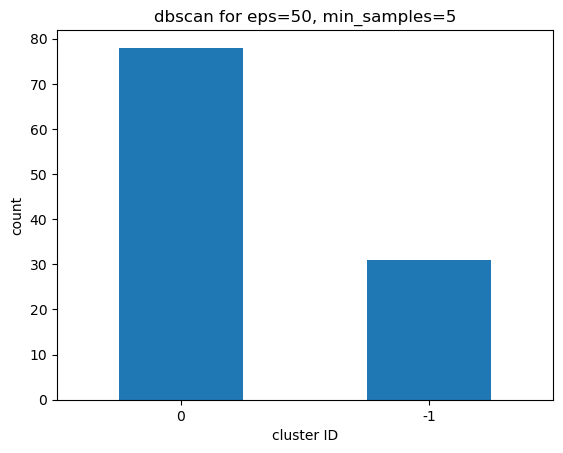

In [190]:
cluster1_counts = df['Cluster1'].value_counts().sort_values(ascending=False)
cluster1_counts.plot(kind='bar')
plt.title('k means for k=3')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

cluster2_counts = df['Cluster2'].value_counts().sort_values(ascending=False)
cluster2_counts.plot(kind='bar')
plt.title('k means for k=4')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

cluster3_counts = df['Cluster3'].value_counts().sort_values(ascending=False)
cluster3_counts.plot(kind='bar')
plt.title('k means for k=5')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

cluster4_counts = df['Cluster4'].value_counts().sort_values(ascending=False)
cluster4_counts.plot(kind='bar')
plt.title('dbscan for eps=50, min_samples=3')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

cluster5_counts = df['Cluster5'].value_counts().sort_values(ascending=False)
cluster5_counts.plot(kind='bar')
plt.title('dbscan for eps=40, min_samples=3')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

cluster6_counts = df['Cluster6'].value_counts().sort_values(ascending=False)
cluster6_counts.plot(kind='bar')
plt.title('dbscan for eps=50, min_samples=5')
plt.xlabel('cluster ID')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

### Task 4.3

/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexisdinardo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

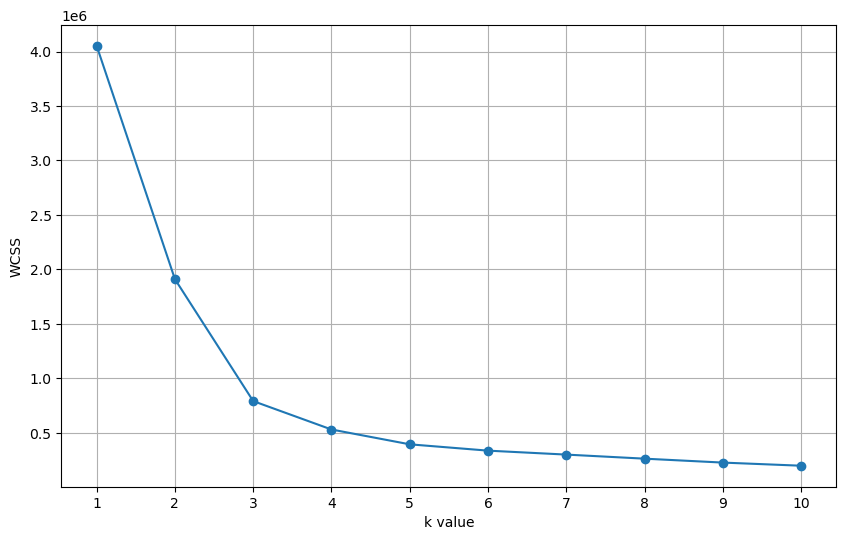

In [192]:
#code to create elbow method graph
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5000)
    kmeans.fit(df[params])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Through using the elbow method to decide what values of k would be best to try on the clusters (code is in block above), I found that 3, 4, and 5 were the best ones to test out. Deciding this from the fact that this was the value from which the curve begins to flatten out. From there, I could see from the bar graphs that 4 is the optimal value of k in this sense, because it has the most evenly spread out clusters, as there are two bigger clusters with an almost even amount of points and then two smaller ones. As opposed to 5, that still has two larger clusters, but the last 3 are broken down into even smaller, more sparse ones. From this, I concluded that the most optimal value of k is 4. 

### Task 4.4

I found the best two algorithms for this dataset would be both from k means, using k = 4 and k = 5. From all the dbscan tests I ran, even through trying a bunch of different values for eps and minimum samples, I found that there will always be a large amount of outliers (in cluster -1) regardless of what parameters were tried. With k means however, it seemed that with this dataset, it produced a decent amount of points within each cluster, and therefore would result in decent clustering. With dbscan, there were too many outliers being produced from the algorithm that points to it producing bad clusters. 